In [35]:
import pandas as pd

df = pd.read_csv("audio_features_final.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2996 entries, 0 to 2995
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_spectral_centroid   2996 non-null   float64
 1   std_spectral_centroid    2996 non-null   float64
 2   mean_spectral_bandwidth  2996 non-null   float64
 3   std_spectral_bandwidth   2996 non-null   float64
 4   mean_spectral_contrast   2996 non-null   float64
 5   mean_spectral_flatness   2996 non-null   float64
 6   mean_spectral_rolloff    2996 non-null   float64
 7   zero_crossing_rate       2996 non-null   float64
 8   rms_energy               2996 non-null   float64
 9   mean_pitch               2996 non-null   float64
 10  min_pitch                2996 non-null   float64
 11  max_pitch                2996 non-null   float64
 12  std_pitch                2996 non-null   float64
 13  spectral_skew            2996 non-null   float64
 14  spectral_kurtosis       

In [36]:
print(df.head())

   mean_spectral_centroid  std_spectral_centroid  mean_spectral_bandwidth  \
0             2523.231827            1832.982941              1149.654083   
1             1542.213606            1001.261703              1316.990525   
2             2179.993253            1543.676335              1444.146313   
3             2301.647978            2046.331134              1019.403659   
4             2025.016079            1705.281012              1226.477797   

   std_spectral_bandwidth  mean_spectral_contrast  mean_spectral_flatness  \
0              526.589132               33.620332                0.055383   
1              641.044093               35.872289                0.014409   
2              675.637252               31.597122                0.117705   
3              636.872378               27.819356                0.408344   
4              738.085532               30.073968                0.135017   

   mean_spectral_rolloff  zero_crossing_rate  rms_energy  mean_pitch  ... 

In [37]:
df['target'] = df['gender'] + "_" + df['age']


In [38]:
X = df.drop(columns=['gender', 'age', 'target'])
y = df['target']

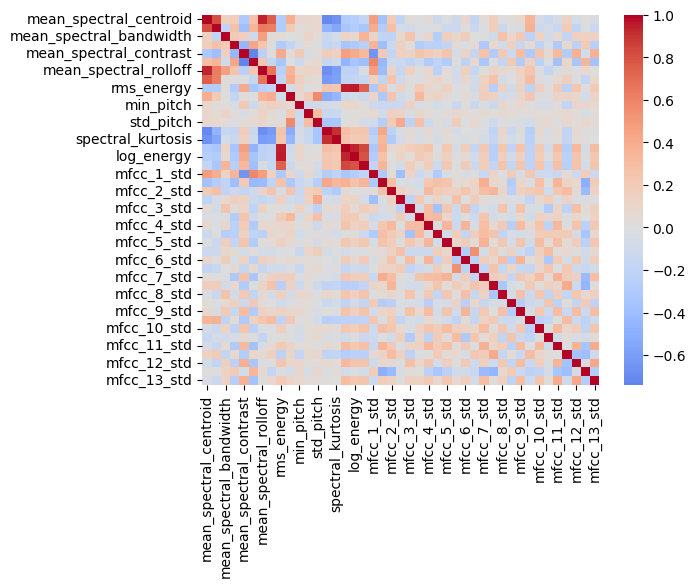

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = X.corr()
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.show()

In [40]:
import numpy as np

# Calcula la matriz de correlación absoluta
corr_matrix = X.corr().abs()

# Mantén solo la parte superior de la matriz (para evitar duplicados)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Encuentra las columnas con correlación alta (> 0.9)
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

print("Variables altamente correlacionadas (a eliminar):", to_drop)
# Crea un nuevo dataset sin las variables redundantes
X_reduced = X.drop(columns=to_drop)

Variables altamente correlacionadas (a eliminar): ['mean_spectral_rolloff', 'spectral_kurtosis', 'energy_entropy', 'log_energy']


Original: 43 variables
Reducido: 39 variables


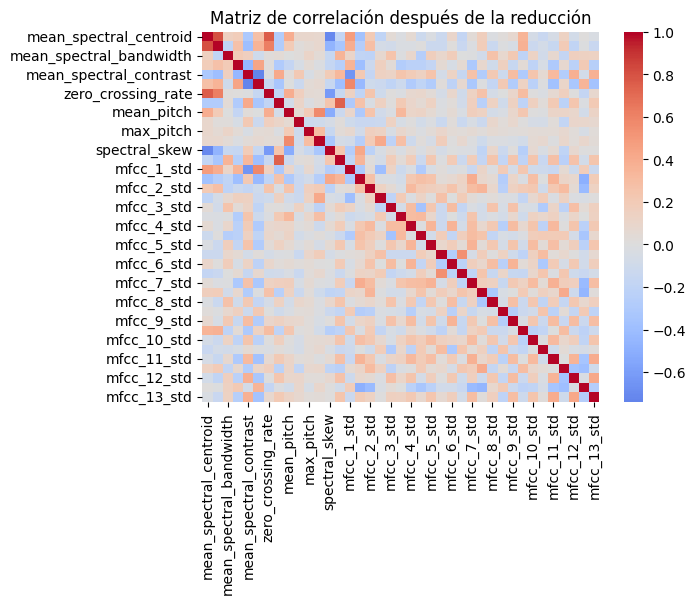

In [41]:
print(f"Original: {X.shape[1]} variables")
print(f"Reducido: {X_reduced.shape[1]} variables")

sns.heatmap(X_reduced.corr(), cmap='coolwarm', center=0)
plt.title("Matriz de correlación después de la reducción")
plt.show()

Top 20 variables más importantes (% de contribución):

mfcc_5_mean: 8.71%
mfcc_10_mean: 6.13%
mfcc_7_mean: 5.54%
std_spectral_centroid: 5.08%
mfcc_8_mean: 4.24%
mfcc_12_mean: 3.91%
mfcc_13_mean: 3.90%
mean_spectral_centroid: 3.90%
mean_spectral_contrast: 3.36%
mfcc_3_std: 3.29%
mean_spectral_flatness: 3.18%
mfcc_7_std: 3.09%
mfcc_6_mean: 2.72%
mfcc_11_mean: 2.52%
mfcc_2_std: 2.51%
mfcc_2_mean: 2.48%
std_spectral_bandwidth: 2.35%
mfcc_1_std: 2.15%
mfcc_9_mean: 2.09%
mfcc_4_mean: 2.04%


C:\Users\jlpar\AppData\Local\Temp\ipykernel_27476\2536376004.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20.values, y=top_20.index, palette="viridis")


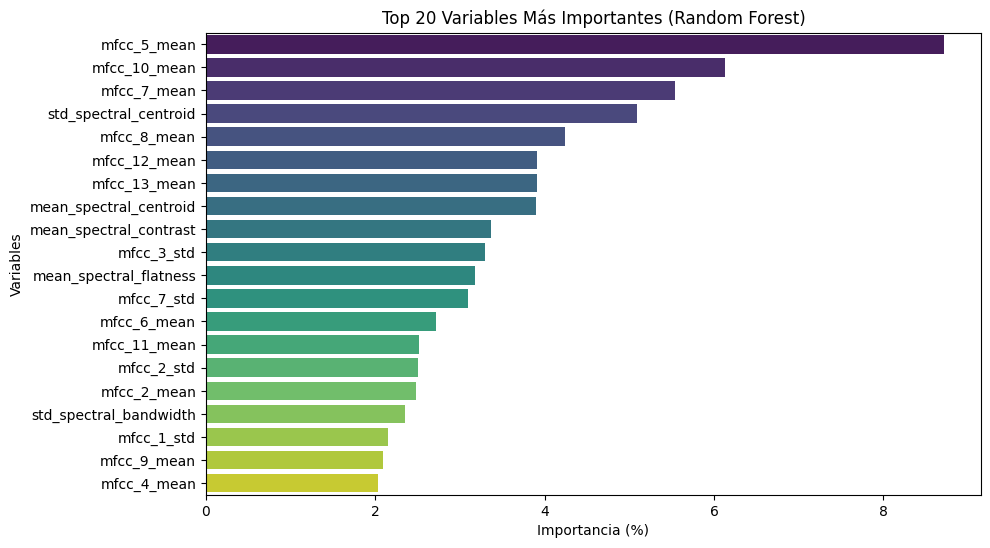

In [42]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf.fit(X_reduced, y)  # entrenamiento exploratorio

importances = pd.Series(rf.feature_importances_, index=X_reduced.columns)
importances_percent = (importances / importances.sum()) * 100

top_20 = importances_percent.sort_values(ascending=False).head(20)

print("Top 20 variables más importantes (% de contribución):\n")
for feature, importance in top_20.items():
    print(f"{feature}: {importance:.2f}%")

plt.figure(figsize=(10, 6))
sns.barplot(x=top_20.values, y=top_20.index, palette="viridis")
plt.title("Top 20 Variables Más Importantes (Random Forest)")
plt.xlabel("Importancia (%)")
plt.ylabel("Variables")
plt.show()



In [43]:
# Seleccionamos las 20 variables con mayor importancia
top_20_features = importances.head(20).index

print("Top 20 variables más importantes:")
for i, feature in enumerate(top_20_features, 1):
    print(f"{i}. {feature}")

# Creamos un nuevo DataFrame con solo esas columnas
X_top20 = X_reduced[top_20_features]


Top 20 variables más importantes:
1. mean_spectral_centroid
2. std_spectral_centroid
3. mean_spectral_bandwidth
4. std_spectral_bandwidth
5. mean_spectral_contrast
6. mean_spectral_flatness
7. zero_crossing_rate
8. rms_energy
9. mean_pitch
10. min_pitch
11. max_pitch
12. std_pitch
13. spectral_skew
14. mfcc_1_mean
15. mfcc_1_std
16. mfcc_2_mean
17. mfcc_2_std
18. mfcc_3_mean
19. mfcc_3_std
20. mfcc_4_mean


In [44]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_top20, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)


In [46]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [47]:
from sklearn.metrics import classification_report

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))


               precision    recall  f1-score   support

 female_adult       0.71      0.59      0.64       150
female_senior       0.78      0.89      0.83       150
 female_young       0.67      0.60      0.63       149
   male_adult       0.75      0.87      0.80       150
  male_senior       0.86      0.93      0.89       150
   male_young       0.90      0.80      0.85       150

     accuracy                           0.78       899
    macro avg       0.78      0.78      0.78       899
 weighted avg       0.78      0.78      0.78       899



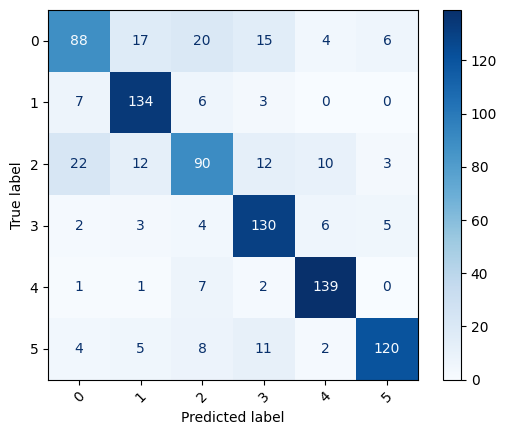

In [48]:
#Matriz de confusion
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(xticks_rotation=45, cmap='Blues')

In [49]:
from sklearn.metrics import roc_auc_score

# predicciones de probabilidad (cada columna es una clase)
y_proba = rf.predict_proba(X_test)

# calcula el AUC ROC para el escenario multiclase
auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
print(f"AUC ROC (One-vs-Rest): {auc:.3f}")


AUC ROC (One-vs-Rest): 0.955
